# Trabajo IA

## Selección de características para mejorar modelos predictivos

Aqui añadimos una descripcion de lo que vamos a hacer y tal

### Algoritmo de búsqueda hacia atrás

In [51]:
import pandas as pd
import BusquedaSecuencialAtras as bsa
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

titanic = pd.read_csv('../data/titanic.csv')
titanic.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Survived
0,3,male,22.0,1,0,7.2500,S,0,1,1,No,0,U,11,0,0
1,1,female,38.0,1,0,71.2833,C,1,2,1,No,3,C,12,1,1
2,3,female,26.0,0,0,7.9250,S,2,1,0,Yes,1,U,8,0,1
3,1,female,35.0,1,0,53.1000,S,1,2,1,No,3,C,12,1,1
4,3,male,35.0,0,0,8.0500,S,0,2,0,Yes,1,U,11,0,0


In [52]:
atributos_discretos = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age_band', 
'Family_Size', 'Alone', 'Fare_cat', 'Deck', 'Title', 'Is_Married','Survived']
atributos_continuos = ['Age', 'Fare']
atributos = titanic.loc[:, atributos_discretos + atributos_continuos]

In [53]:
objetivo = titanic['Survived']
objetivo.head()  # objetivo es una Series unidimensional

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [55]:
codificador_atributos_discretos = OrdinalEncoder()
codificador_atributos_discretos.fit(atributos[atributos_discretos])

OrdinalEncoder()

In [56]:
print('Número de atributos detectados:',
      f'{codificador_atributos_discretos.n_features_in_}')
print()
print('Nombres de los atributos detectados:')
print(f'{codificador_atributos_discretos.feature_names_in_}')
print()
print('Categorías detectadas de cada atributo:')
for atributo, categorías in zip(
    codificador_atributos_discretos.feature_names_in_,
    codificador_atributos_discretos.categories_):
    print(f'{atributo}: {categorías}')

Número de atributos detectados: 14

Nombres de los atributos detectados:
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Initial' 'Age_band'
 'Family_Size' 'Alone' 'Fare_cat' 'Deck' 'Title' 'Is_Married' 'Survived']

Categorías detectadas de cada atributo:
Pclass: [1 2 3]
Sex: ['female' 'male']
SibSp: [0 1 2 3 4]
Parch: [0 1 2 5]
Embarked: ['C' 'Q' 'S']
Initial: [0 1 2 3]
Age_band: [0 1 2 3 4]
Family_Size: [0 1 2 4 5 6]
Alone: ['No' 'Yes']
Fare_cat: [0 1 2 3]
Deck: ['A' 'B' 'C' 'D' 'E' 'G' 'U']
Title: [ 2  7  8 11 12]
Is_Married: [0 1]
Survived: [0 1]


In [57]:
atributos[atributos_discretos] = codificador_atributos_discretos.transform(atributos[atributos_discretos])

atributos.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Survived,Age,Fare
0,2.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,6.0,3.0,0.0,0.0,22.0,7.2500
1,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,1.0,1.0,38.0,71.2833
2,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,6.0,2.0,0.0,1.0,26.0,7.9250
3,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,1.0,1.0,35.0,53.1000
4,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,6.0,3.0,0.0,0.0,35.0,8.0500


In [58]:
codificador_objetivo = LabelEncoder()
# El método fit_transform ajusta el codificador a los datos y, a continuación,
# codifica estos adecuadamente. En este caso no necesitamos mantener el
# atributo objetivo como una Series de Pandas.
objetivo = codificador_objetivo.fit_transform(objetivo)
print(f'Clases detectadas: {codificador_objetivo.classes_}')


Clases detectadas: [0 1]


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
normalizador = MinMaxScaler(
    # Cada atributo se normaliza al intervalo [0, 1]
    feature_range=(0, 1)
)

# Como nos interesa conservar los atributos originales, realizamos la
# normalización sobre una copia del DataFrame de atributos
atributos_normalizados = atributos.copy()
atributos_normalizados[:] = normalizador.fit_transform(atributos_normalizados)
atributos_normalizados.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Survived,Age,Fare
0,1.0,1.0,0.25,0.0,1.0,0.000000,0.25,0.2,0.0,0.000000,1.000000,0.75,0.0,0.0,0.312500,0.000098
1,0.0,0.0,0.25,0.0,0.0,0.333333,0.50,0.2,0.0,1.000000,0.333333,1.00,1.0,1.0,0.562500,0.250448
2,1.0,0.0,0.00,0.0,1.0,0.666667,0.25,0.0,1.0,0.333333,1.000000,0.50,0.0,1.0,0.375000,0.002737
3,0.0,0.0,0.25,0.0,1.0,0.333333,0.50,0.2,0.0,1.000000,0.333333,1.00,1.0,1.0,0.515625,0.179357
4,1.0,1.0,0.00,0.0,1.0,0.000000,0.50,0.0,1.0,0.333333,1.000000,0.75,0.0,0.0,0.515625,0.003225


In [61]:
titanic = atributos_normalizados.copy()
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Survived,Age,Fare
0,1.0,1.0,0.25,0.0,1.0,0.000000,0.25,0.2,0.0,0.000000,1.000000,0.75,0.0,0.0,0.312500,0.000098
1,0.0,0.0,0.25,0.0,0.0,0.333333,0.50,0.2,0.0,1.000000,0.333333,1.00,1.0,1.0,0.562500,0.250448
2,1.0,0.0,0.00,0.0,1.0,0.666667,0.25,0.0,1.0,0.333333,1.000000,0.50,0.0,1.0,0.375000,0.002737
3,0.0,0.0,0.25,0.0,1.0,0.333333,0.50,0.2,0.0,1.000000,0.333333,1.00,1.0,1.0,0.515625,0.179357
4,1.0,1.0,0.00,0.0,1.0,0.000000,0.50,0.0,1.0,0.333333,1.000000,0.75,0.0,0.0,0.515625,0.003225


In [62]:
bsa.backward_sequential_search(titanic,'Survived', model)

KeyboardInterrupt: 

#### Algoritmo: árboles decisión de clasificación

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.tree import plot_tree

In [ ]:
atributos_discretos = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age_band', 
'Family_Size', 'Alone', 'Fare_cat', 'Deck', 'Title', 'Is_Married']
atributos_continuos = ['Age', 'Fare']
atributos = titanic.loc[:, atributos_discretos + atributos_continuos]


In [ ]:
objetivo = titanic['Survived']
objetivo.head()  # objetivo es una Series unidimensional

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
codificador_atributos_discretos = OrdinalEncoder()
codificador_atributos_discretos.fit(atributos[atributos_discretos])

atributos[atributos_discretos] = codificador_atributos_discretos.transform(
    atributos[atributos_discretos]
)
atributos.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Deck,Title,Is_Married,Age,Fare
0,2.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,8.0,11.0,0.0,22.0,7.2500
1,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,12.0,1.0,38.0,71.2833
2,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,8.0,8.0,0.0,26.0,7.9250
3,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,3.0,2.0,12.0,1.0,35.0,53.1000
4,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,8.0,11.0,0.0,35.0,8.0500


In [ ]:
codificador_objetivo = LabelEncoder()
objetivo = codificador_objetivo.fit_transform(objetivo)
print(f'Clases detectadas: {codificador_objetivo.classes_}')


Clases detectadas: [0 1]


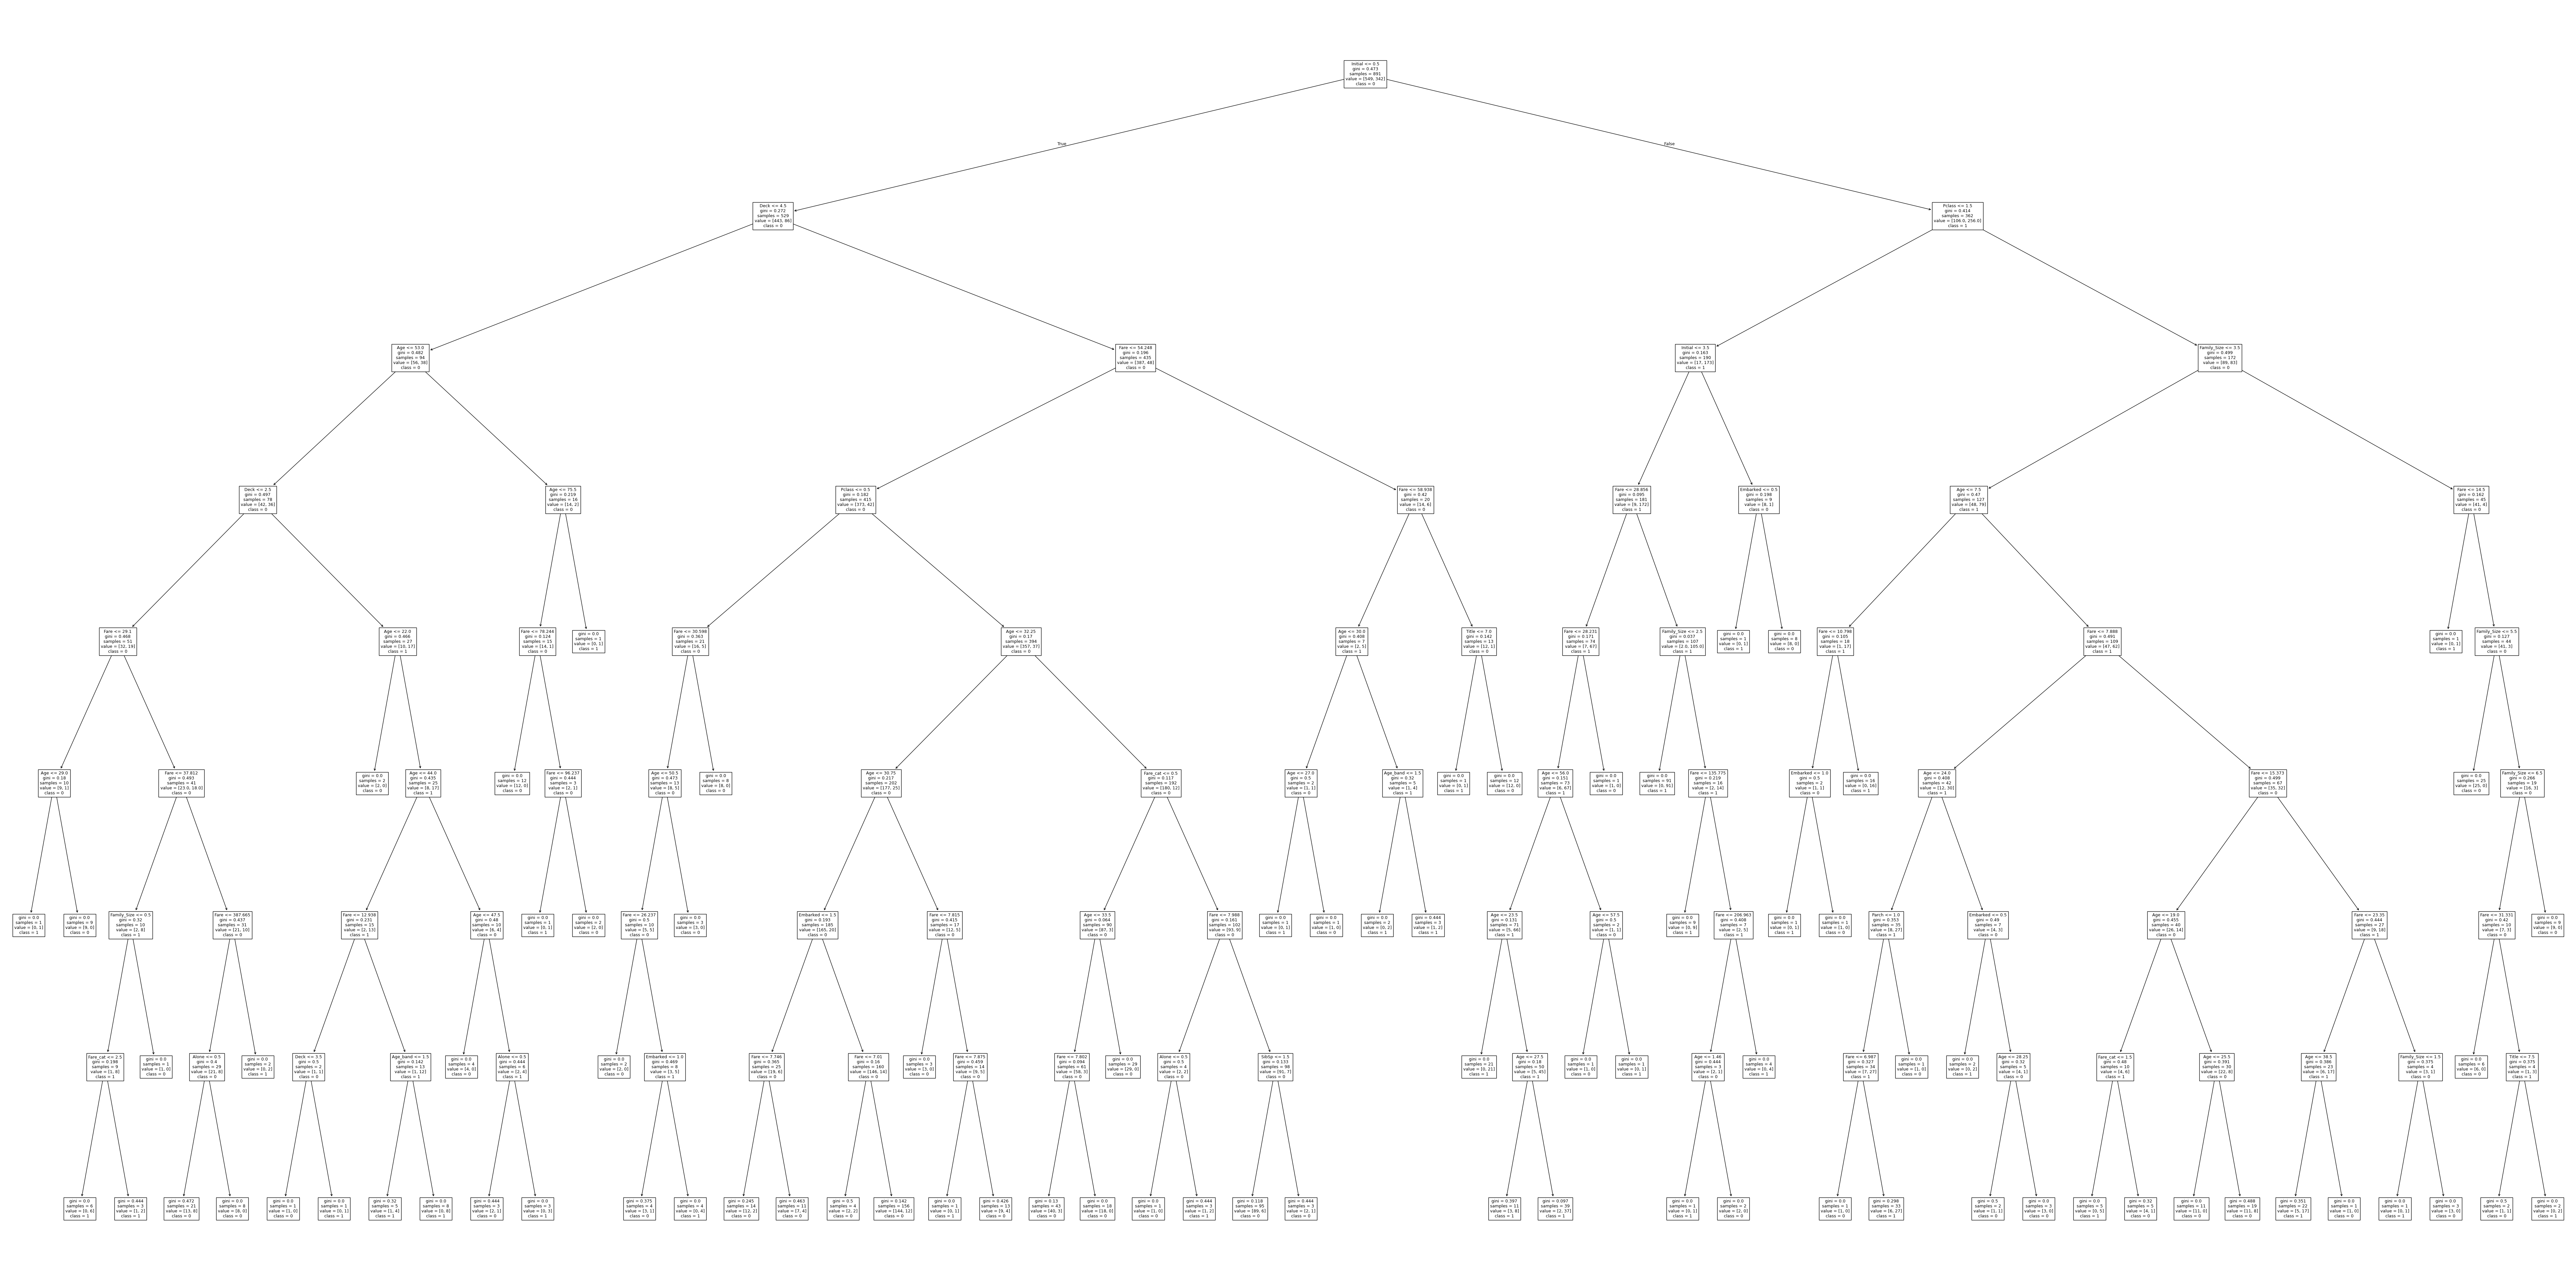

In [ ]:

clasificador_CART = DecisionTreeClassifier(
    max_depth=8
)
clasificador_CART.fit(atributos, objetivo)


pyplot.figure(figsize=(100, 50))  # Anchura y altura del gráfico
árbol = plot_tree(clasificador_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=atributos_discretos + atributos_continuos,
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['0', '1'])

In [ ]:
# Predicciones

predicciones = clasificador_CART.predict(atributos)
predicciones


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
clasificador_CART.score(atributos, objetivo)


0.9158249158249159

In [ ]:
pd.Series(objetivo).value_counts()


0    549
1    342
Name: count, dtype: int64

In [ ]:
pd.Series(predicciones).value_counts()

0    584
1    307
Name: count, dtype: int64

### Tasa de aciertos balanceada

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo)


clasificador_CART = DecisionTreeClassifier(
    max_depth=4,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)

resultados_validación_cruzada = cross_validate(clasificador_CART,
                                               atributos_entrenamiento,
                                               objetivo_entrenamiento,
                                               scoring='recall',
                                               cv=10)
resultados_validación_cruzada


resultados_validación_cruzada['test_score'].mean()

0.6665343915343915